# The Spark Foundation Internship




# 

# Predicting Percentage score of an student based on no. of study hours

#                    TASK 1

# Batch - #GRIPFEB2023

# Made by Mrinal Kumar

# 

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Importing Data

In [3]:
df=pd.read_csv(r'C:\Users\Mrinal\Desktop\The spark foundation internship\Task_1.csv_2.csv')

In [4]:
# observe the dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# see how many rows and columns are prsent in dataset
df.shape

(25, 2)

In [6]:
# gives information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# check whether dataset contains missing value or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualizing the dataset

we plot the dataset to check whether we can observe any relationship between the two variables or not

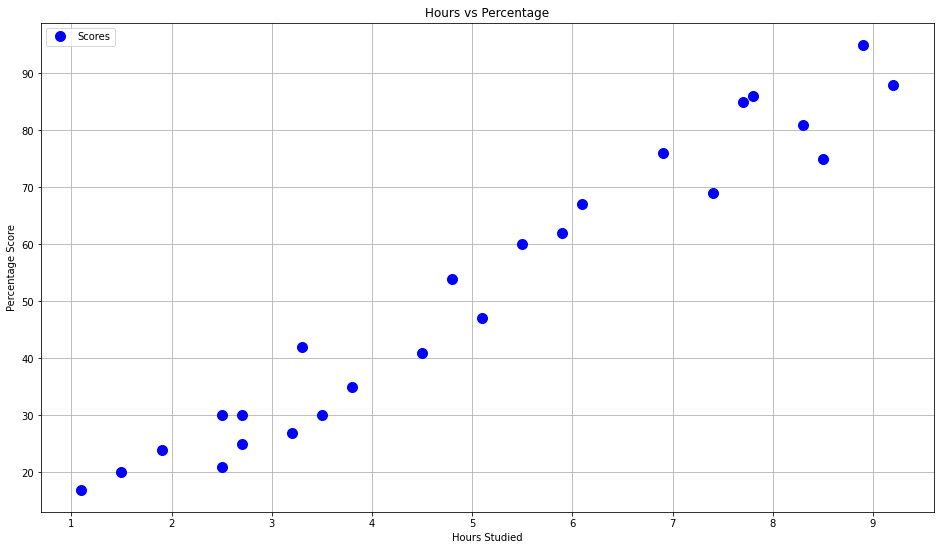

In [9]:
# plotting the dataset
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours', y='Scores', style='o', color='blue', markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

From the graph above we can observe that there is a linear relationship between "hours studied" and "percentage score". so we 
can use the linear regression supervised machine learning model on it to predict further values.

In [10]:
# corr to determine the correlation between variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data preparation

In [11]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
#  iloc function divide the data
X=df.iloc[:,:1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y=df.iloc[:,1:].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [14]:
# splitting the data into train and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.coef_

array([[9.91065648]])

In [17]:
model.intercept_

array([2.01816004])

In [18]:
line = model.coef_*X + model.coef_
line

array([[ 34.68729768],
       [ 60.45500453],
       [ 41.62475722],
       [ 94.15123657],
       [ 44.59795416],
       [ 24.7766412 ],
       [101.0886961 ],
       [ 64.41926712],
       [ 92.16910527],
       [ 36.66942898],
       [ 86.22271138],
       [ 68.38352972],
       [ 54.50861064],
       [ 42.61582287],
       [ 20.81237861],
       [ 98.11549916],
       [ 34.68729768],
       [ 28.74090379],
       [ 70.36566101],
       [ 83.24951444],
       [ 36.66942898],
       [ 57.48180759],
       [ 47.57115111],
       [ 78.2941862 ],
       [ 87.21377703]])

after training the model, now its time to visualize it

# Visualizing the model

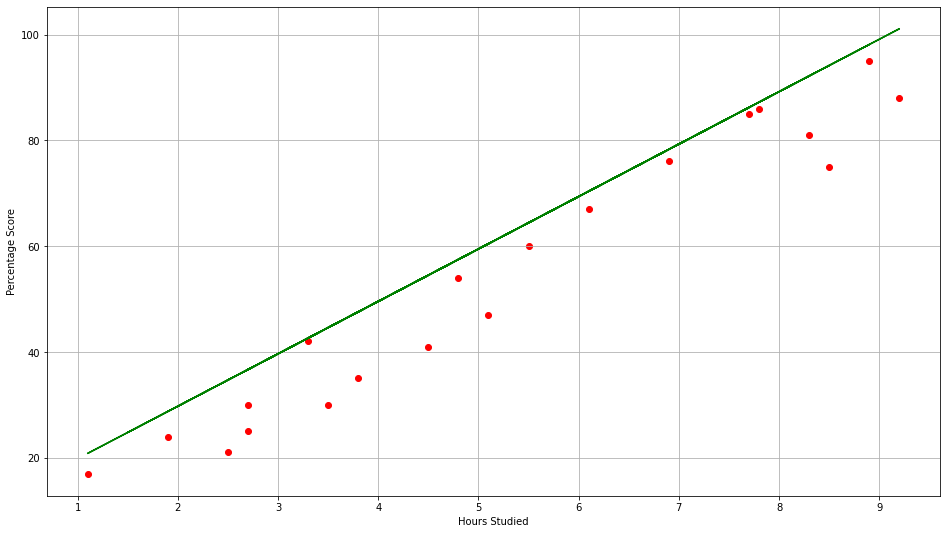

In [19]:
# plotting for the training data

plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

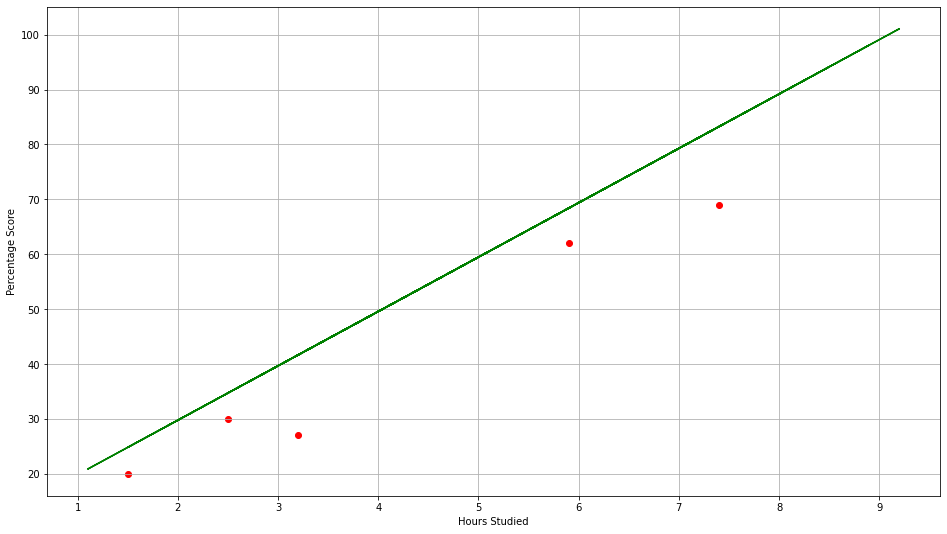

In [20]:
# plotting for test dataset

plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_test, y_test, color='red')
plt.plot(X, line, color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

# Making prediction

we have trained our algorithm, now we can make predictions

In [21]:
print(X_test) # Testing data - In hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
y_pred=model.predict(X_test) # Predicting scores

In [23]:
# predicting actual vs predicted
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [24]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [25]:
# comparing actual vs predicted
comp=pd.DataFrame({'Actual':[y_test], 'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [26]:
# Testing with our won data
given_hours=9.25
own_pred=model.predict([[given_hours]])
print('The predicted score if a person studied for', given_hours, 'hours is', own_pred[0])

The predicted score if a person studied for 9.25 hours is [93.69173249]


# Evaluating the model

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
